# Import Library

In [1]:
import pandas as pd
import numpy as np
import statsmodels.stats.proportion as sp

import matplotlib.pyplot as plt
import seaborn as sns

# AB Testing / Experimental Design

## Import Dataset

In [2]:
df_abtest = pd.read_csv('ab_data.csv')

In [3]:
df_abtest

,user_id,timestamp,group,landing_page,converted
0,851104,2017-01-21 22:11:48.556739,control,old_page,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0
4,864975,2017-01-21 01:52:26.210827,control,old_page,1
...,...,...,...,...,...
294473,751197,2017-01-03 22:28:38.630509,control,old_page,0
294474,945152,2017-01-12 00:51:57.078372,control,old_page,0
294475,734608,2017-01-22 11:45:03.439544,control,old_page,0
294476,697314,2017-01-15 01:20:28.957438,control,old_page,0


## Separate Control and Treatment Dataset

In [4]:
control = df_abtest[df_abtest['group']=='control']
treatment = df_abtest[df_abtest['group']=='treatment']

## Calculate Number of Success and Number of Observation

In [5]:
n_success_control = control['converted'].sum()
n_success_treatment = treatment['converted'].sum()

n_obs_control = control['converted'].count()
n_obs_treatment = treatment['converted'].count()

## Calculate Descriptive Statistics

In [6]:
control_conversion_rate = n_success_control/n_obs_control
treatment_conversion_rate = n_success_treatment/n_obs_treatment

In [7]:
print('Conversion Rate from Control : {0:0.4f}'.format(control_conversion_rate))
print('Conversion Rate from Treatment : {0:0.4f}'.format(treatment_conversion_rate))

Conversion Rate from Control : 0.1204
Conversion Rate from Treatment : 0.1189


(0.118, 0.1205)

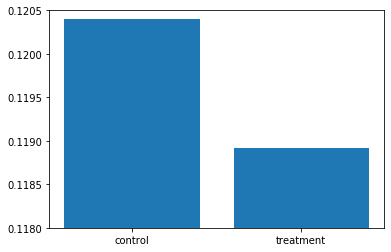

In [8]:
x = ['control','treatment']
value = [control_conversion_rate,treatment_conversion_rate]
plt.bar(x,value)

plt.ylim(0.118,0.1205)

***is the difference significance?*** <br>

## Do Hypothesis Testing

In [9]:
## making array
success = np.array([n_success_control,n_success_treatment])
obs = np.array([n_obs_control,n_obs_treatment])

H0: existing design and new design **have same** conversion rate <br>
H1: existing design and new design **do not have same** conversion rate

In [10]:
stats,pvalue = sp.proportions_ztest(success,obs)

In [11]:
print('P-Value : '+ str(pvalue))
if pvalue >= 0.05:
    print('Insufficient to reject H0')
else :
    print('Sufficient to reject H0')

P-Value : 0.21611613269757501
Insufficient to reject H0
